In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Préparation des Données
### Création du DataFrame avec les données fournies

In [23]:

data = {
    'Mois': ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'],
    'Google Ads (k€)': [20, 22, 23, 21, 24, 25, 26, 27, 26, 25, 28, 30],
    'Facebook Ads (k€)': [15, 16, 17, 15, 18, 18, 19, 20, 19, 18, 21, 22],
    'Instagram Ads (k€)': [10, 11, 12, 11, 13, 14, 15, 16, 15, 14, 17, 18],
    'Revenus (k€)': [500, 530, 550, 520, 570, 590, 610, 630, 620, 600, 650, 680]
}

df = pd.DataFrame(data)
print(df.head())


      Mois  Google Ads (k€)  Facebook Ads (k€)  Instagram Ads (k€)  \
0  Janvier               20                 15                  10   
1  Février               22                 16                  11   
2     Mars               23                 17                  12   
3    Avril               21                 15                  11   
4      Mai               24                 18                  13   

   Revenus (k€)  
0           500  
1           530  
2           550  
3           520  
4           570  


# 2. Visualisation Globale

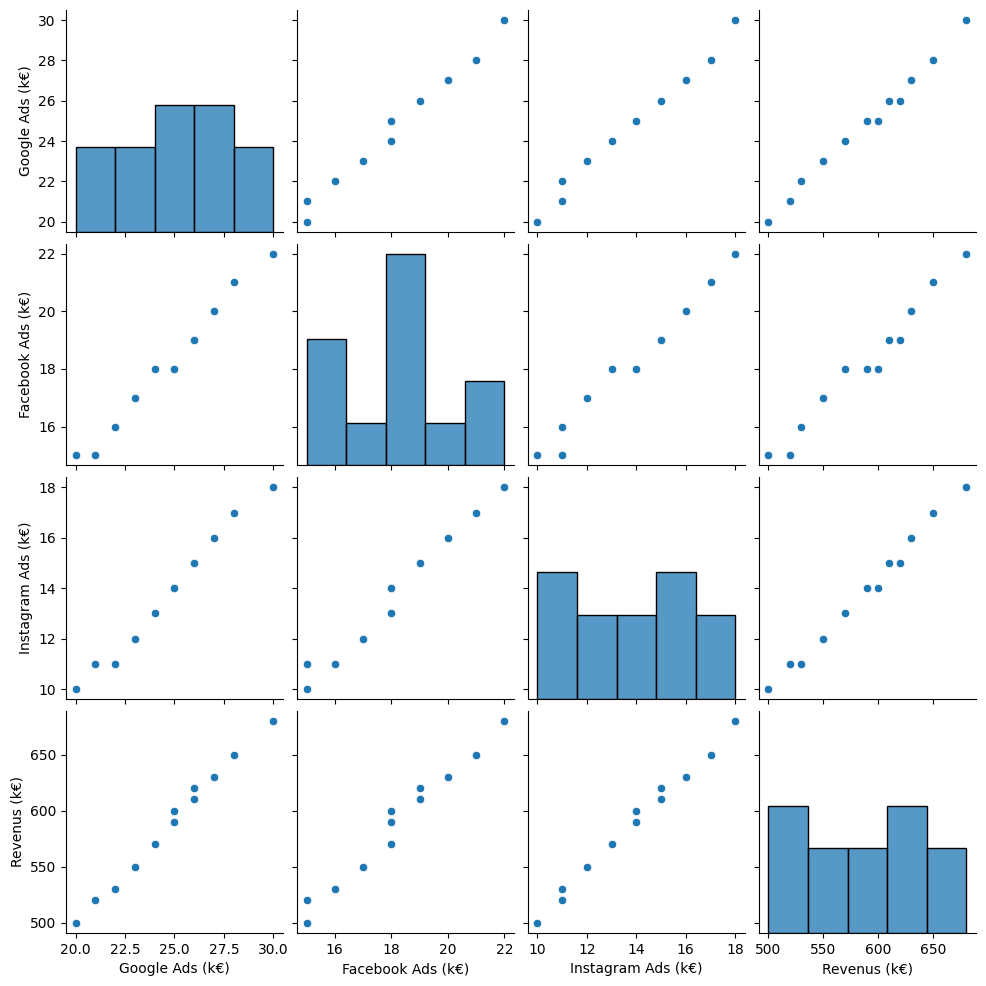

In [24]:
sns.pairplot(df)
plt.show()


# 3. Visualisation des Tendances Mensuelles

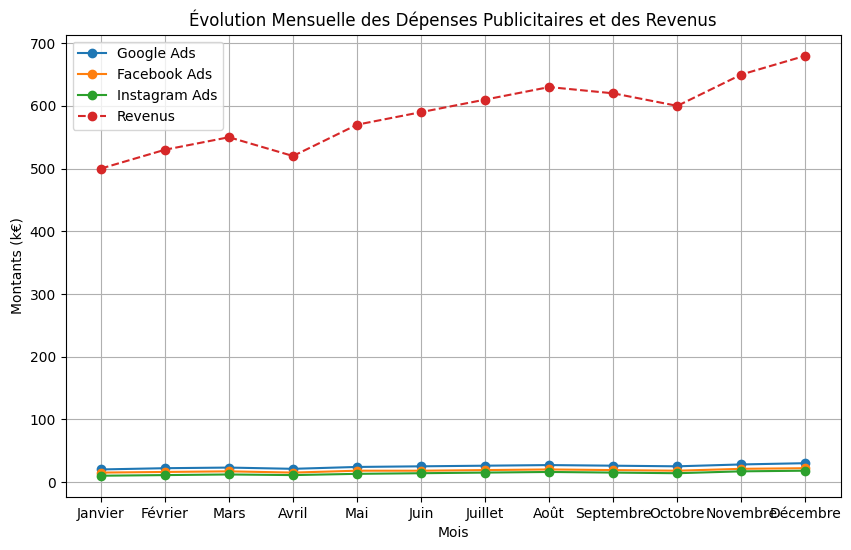

In [25]:
plt.figure(figsize=(10, 6))
# depense
plt.plot(df['Mois'], df['Google Ads (k€)'], marker='o', label='Google Ads')
plt.plot(df['Mois'], df['Facebook Ads (k€)'], marker='o', label='Facebook Ads')
plt.plot(df['Mois'], df['Instagram Ads (k€)'], marker='o', label='Instagram Ads')

print('')

# revenu
plt.plot(df['Mois'], df['Revenus (k€)'], marker='o', label='Revenus', linestyle='--')

plt.xlabel('Mois')
plt.ylabel('Montants (k€)')
plt.title('Évolution Mensuelle des Dépenses Publicitaires et des Revenus')
plt.legend()
plt.grid(True)
plt.show()

# 4. Analyse Comparative des Canaux

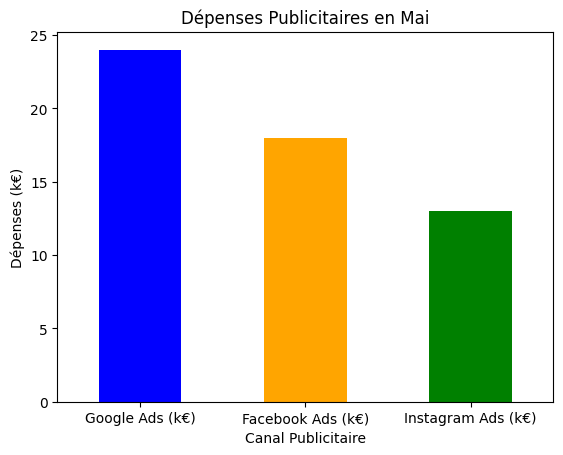

In [26]:
mois_choisi = 'Mai'
index = df[df['Mois'] == mois_choisi].index[0]
data_mois = df.iloc[index, 1:-1] 

data_mois.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title(f'Dépenses Publicitaires en {mois_choisi}')
plt.xlabel('Canal Publicitaire')
plt.ylabel('Dépenses (k€)')
plt.xticks(np.arange(3), data_mois.index, rotation=0)
plt.show()


# 5. Répartition des Dépenses Publicitaires Totales

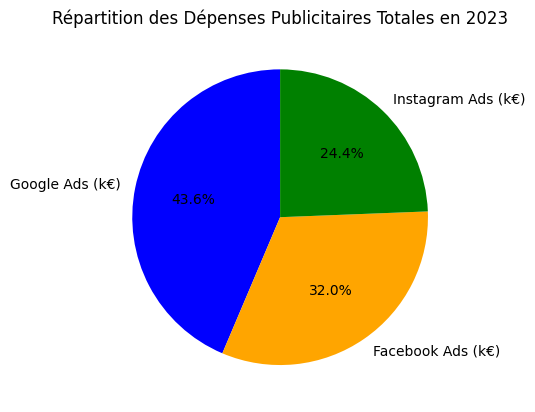

In [27]:
total_depenses = df.iloc[:, 1:4].sum()
total_depenses.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
plt.title('Répartition des Dépenses Publicitaires Totales en 2023')
plt.ylabel('')
plt.show()

# 6. Régression Linéaire

Google ads coef: 12.881355932203315
Facebook ads coef: -5.042372881355885
Instagram ads coef: 11.228813559322056
Intercept :  204.95762711864472

Équation de la régression:
Revenus (k€) = 204.96 + 12.88 * Google Ads (k€) + -5.04 * Facebook Ads (k€) + 11.23 * Instagram Ads (k€)


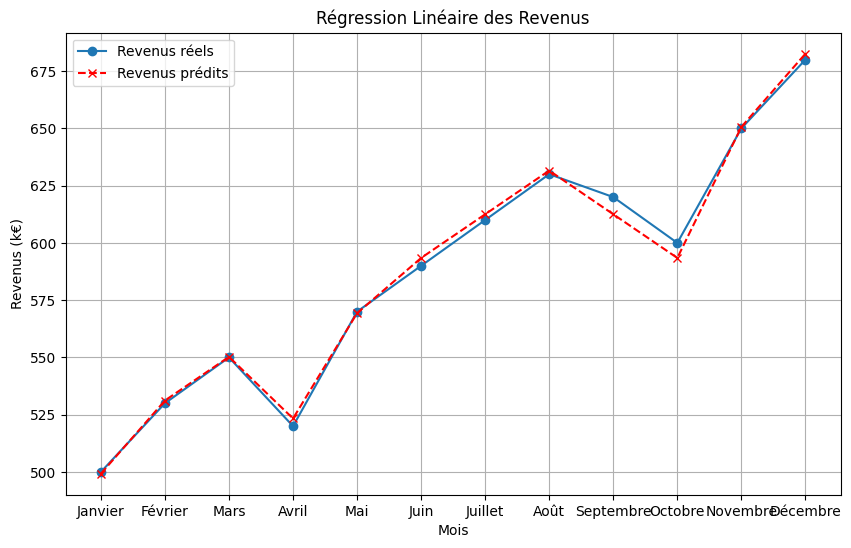

In [28]:

X = df[['Google Ads (k€)', 'Facebook Ads (k€)', 'Instagram Ads (k€)']]
y = df['Revenus (k€)']

model = LinearRegression()
model.fit(X, y)

# Coefficients et intercept
google_ads_coef = model.coef_[0]
facebook_ads_coef = model.coef_[1]
instagram_ads_coef = model.coef_[2]
intercept = model.intercept_

# Affichage des résultats
print("Google ads coef:", google_ads_coef)
print("Facebook ads coef:", facebook_ads_coef)
print("Instagram ads coef:", instagram_ads_coef)
print('Intercept : ', intercept)

# Équation de la régression
print('\nÉquation de la régression:')
print(f"Revenus (k€) = {intercept:.2f} + {google_ads_coef:.2f} * Google Ads (k€) + {facebook_ads_coef:.2f} * Facebook Ads (k€) + {instagram_ads_coef:.2f} * Instagram Ads (k€)")

# prediction
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.plot(df['Mois'], y, marker='o', label='Revenus réels')
plt.plot(df['Mois'], y_pred, marker='x', linestyle='--', color='red', label='Revenus prédits')

plt.xlabel('Mois')
plt.ylabel('Revenus (k€)')
plt.title('Régression Linéaire des Revenus')
plt.legend()
plt.grid(True)
plt.show()

# 7. Insights et Recommandations
### Analyse et Recommandations

Les visualisations montrent une tendance générale à la hausse des revenus au cours de l'année 2023, en corrélation avec l'augmentation des dépenses publicitaires sur les trois canaux. La régression linéaire indique que chaque canal publicitaire contribue de manière significative aux revenus totaux, avec les coefficients les plus élevés associés à Google Ads.

#### Recommandations :
1. **Augmenter les dépenses sur Google Ads** : Il impacte beaucoup les revenus, il serait mieux d'augmenter le budget alloué à celui ci.
2. **Optimiser les campagnes Facebook et Instagram** : Essayer de voir différentes aspects si ils peuvent générer un meilleur retour sur investissement.